Análisis de datos con Python

**Consigna**

Objetivos generales

1. Estructurar un problema en función de múltiples, pero simples preguntas/hipótesis a responder

2. Analizar datos tabulares (e.g excel, csv, etc)  usando Python

3. Utilizar modelos de Machine Learning con Python



#Contexto, Objetivo y Preguntas

**Contexto**
Los terremotos son fenomenos naturales que ocurren con el desplazamiento de placas tectonicas que producen Ondas, pueden ser Ondas S y Ondas P. Además el movimiento de placas tectonicas depende de los límites convergentes, divergentes y tranformantes.
En ese contexto, y debido a los efectos nocivos que producen en la población se desea mediante el Dataset "World Earthquake Data From 1906-2022" analizar y realizar un modelo predictivo de los mismos. En este Dataset se encuentran los sismos registrados dese 1906-2023 con más de 4.5 puntos de magnitud en la Escala Ritcher.

**Objetivo**
Realizar el Analisis del Dataset para la región de Chile realizando el procedimiento de Exploración de datos (EDA) y generar la predicción de posibles eventos futuros mediante un modelo de aprendizaje.

**Preguntas**

1. ¿Cómo es la distribución de los datos?
2. ¿Cómo se distribuyen los eventos en Chile a lo largo de los años?
3. ¿Cómo fueron los eventos agrupados por meses en los últimos 2 años?
4. ¿Cuáles son las zonas más afectadas de Chile?
5. ¿Cómo se distribuye la magnitud de los eventos en Chile a lo largo de los años?

##1) Instalación de librerias e importación

In [ ]:
#Instalar librerias Cartopy para imprimir mediante matplotlib un gráfico de los puntos latitud y longitud
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 1s (127 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Building

In [ ]:
import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns
import numpy as np

##2) Lectura de Dataset

In [ ]:
url='https://raw.githubusercontent.com/CufaGB/Data-Science-Coder/main/Terremotos/Global_Earthquake_Data.csv'
terrem = pd.read_csv(url,sep=';')
terrem.dtypes

<ipython-input-101-5165cd1a1cce>:2: DtypeWarning: Columns (3,7,8,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  terrem = pd.read_csv(url,sep=';')


time                object
latitude            object
longitude           object
depth               object
mag                float64
magType             object
nst                float64
gap                 object
dmin                object
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError     object
depthError          object
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [ ]:
#Conversión de columnas "Latitude" "Longitude" "Depth" a tipo float64
#Cambio la columna "time" a datetime y agrego las columnas informadas antes
terrem['time']=pd.to_datetime(terrem['time'])
terrem['latitude'] = pd.to_numeric(terrem['latitude'],errors='coerce')
terrem['longitude'] = pd.to_numeric(terrem['longitude'],errors='coerce')
terrem['depth'] = pd.to_numeric(terrem['depth'],errors='coerce')
terrem['energía'] = 10 ** (1.5 * terrem['mag'] + 4.8)

terrem.dtypes

time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                             object
dmin                            object
rms                            float64
net                             object
id                              object
updated                         object
place                           object
type                            object
horizontalError                 object
depthError                      object
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
energía                        float64
dtype: object

##3) Reconversión de Dataset con columnas importantes de interes. Reducción de Dimensionalidad

In [ ]:
df = terrem[['time', 'latitude', 'longitude', 'mag','depth','energía','place']]
df
#Eliminación de filas que no contienen datos en las celdas latitud, longitud o profundidad dado que son datos relevantes para el gráfico de la distribución de Datos
data = df[df['latitude'].notna()]
data1 = data[data['longitude'].notna()]
df=data1[data1['depth'].notna()]
df.isna().sum()

time           0
latitude       0
longitude      0
mag            0
depth          0
energía        0
place        588
dtype: int64

In [ ]:
df.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
mag                      float64
depth                    float64
energía                  float64
place                     object
dtype: object

In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'mag', 'depth', 'energía', 'place'], dtype='object')

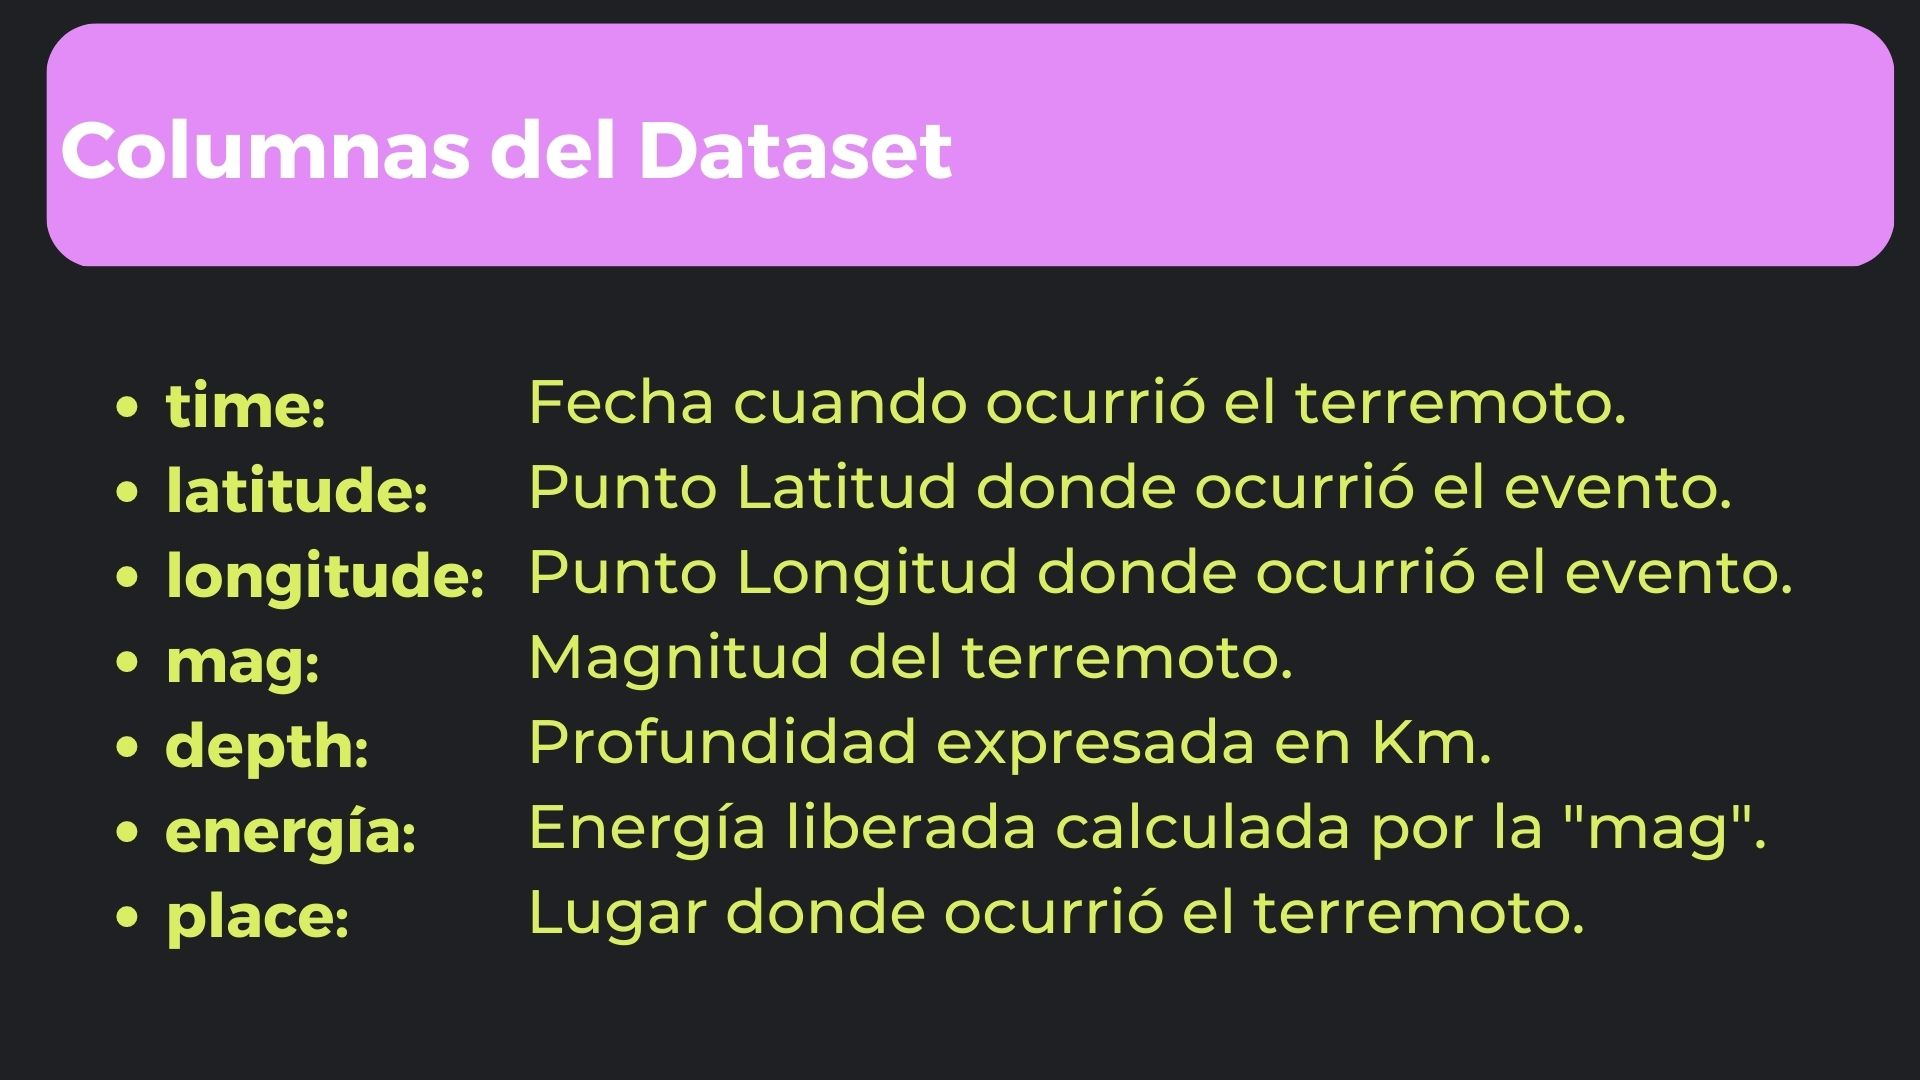

##4) Respuestas



###1.¿Cómo es la distribución de los datos?

Para ver esto volcamos los puntos de la latitud, longitud a un gráfico de Mapa Mundi en función de la magnitud del terremotos.

Text(0.5, 1.0, 'Registros de Terremotos entre 1906-2023')

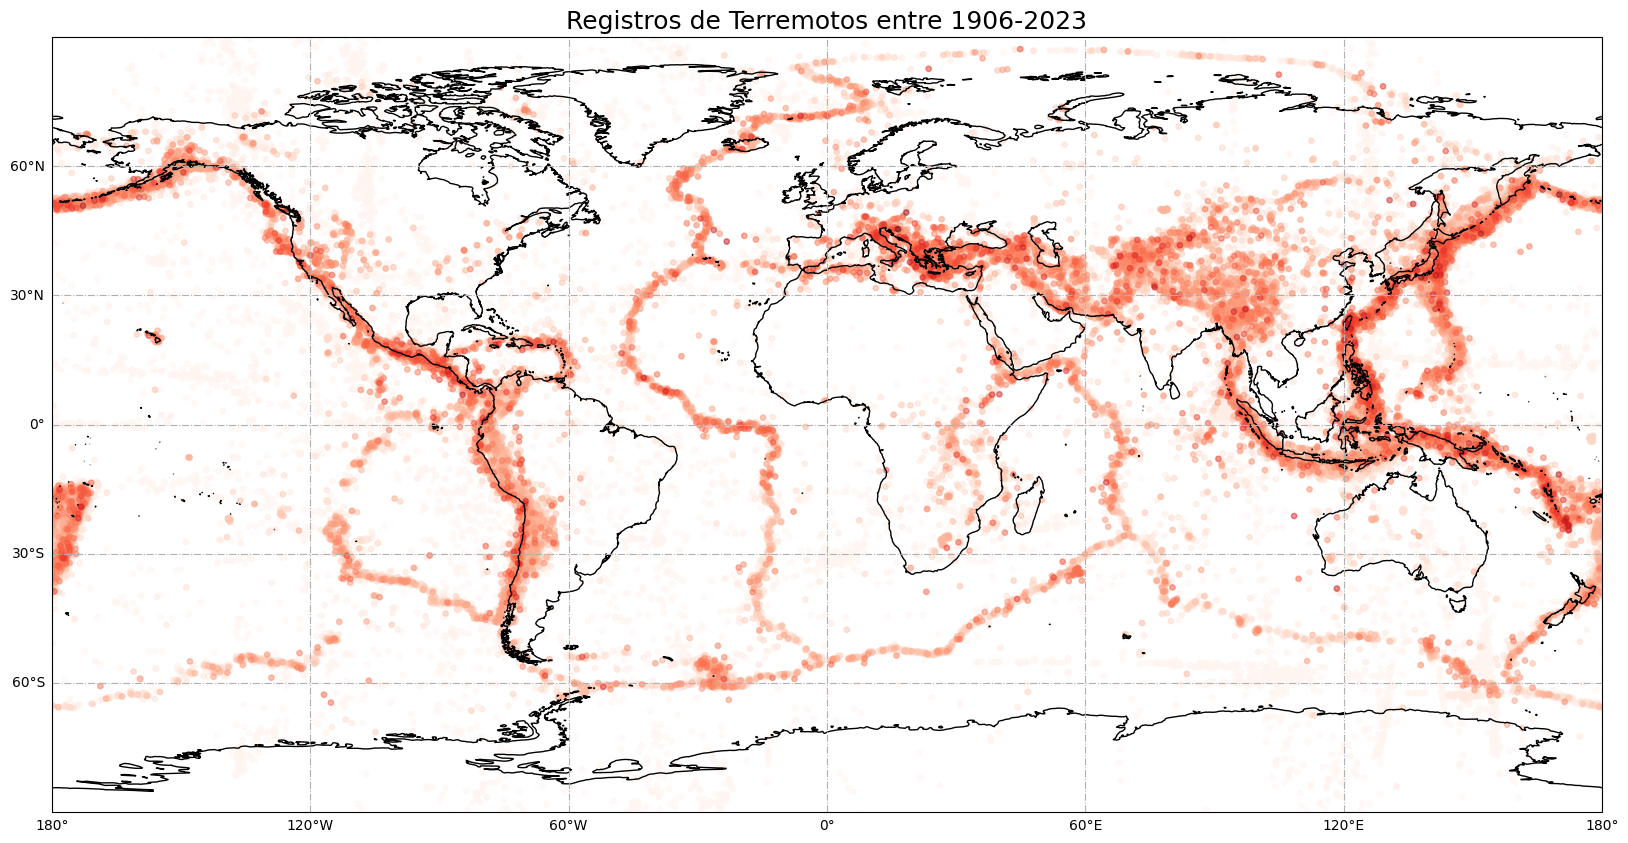

In [ ]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree())
gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False # removing the top label
gl.right_labels = False
ax.coastlines(resolution='50m', color='black', linewidth=1)
p = ax.scatter(x=df['longitude'], y=df['latitude'], c =df['mag'].sort_values(), cmap='Reds', alpha=0.5, s=15)
plt.ylabel('Magnitud', fontsize=16)
plt.title('Registros de Terremotos entre 1906-2023', fontsize=18)

Respuesta: El gráfico nos muestra la importancia de los límites convergentes, divergentes y transformantes de las placas tectónicas, tal como lo muestra la siguiente imagen donde de manera gráfica podemos ver los límites de las placas.
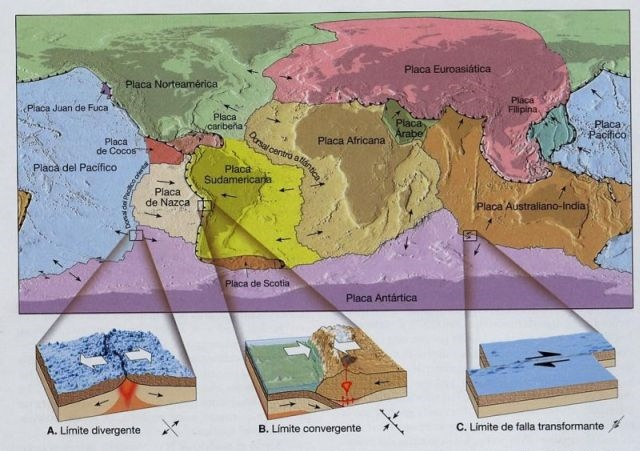

###2.¿Cómo se distribuyen los eventos en Chile a lo largo de los años? ¿Han aumentado los casos a lo largo del tiempo?

<ipython-input-107-f0d76827494c>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  años_terrem=df.groupby(chile['time'].dt.to_period('Y')).size()


<Axes: xlabel='time'>

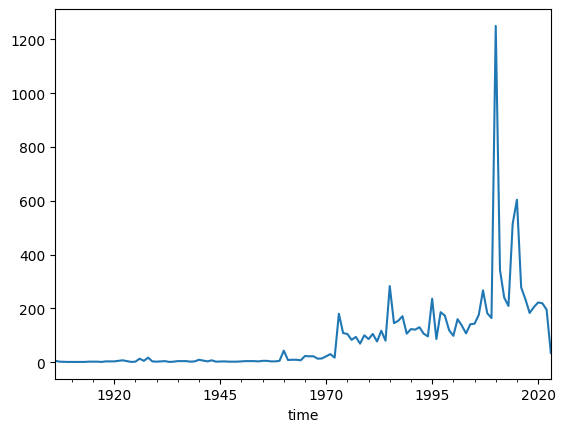

In [ ]:
#Creación de Data Frame con datos de Chile para muestreo de Datos
chile=df[df['place'].str.contains('Chile',case=False,na=False,regex=True)]

años_terrem=df.groupby(chile['time'].dt.to_period('Y')).size()
años_terrem.plot.line()

In [ ]:
años_terrem.describe()

count     112.000000
mean       90.705357
std       153.419853
min         1.000000
25%         3.000000
50%        22.000000
75%       137.250000
max      1250.000000
dtype: float64

<ipython-input-109-629c36210cff>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ultimos_años=df.groupby(ultimos_20años['time'].dt.to_period('Y')).size()


Text(0.5, 0, 'Año')

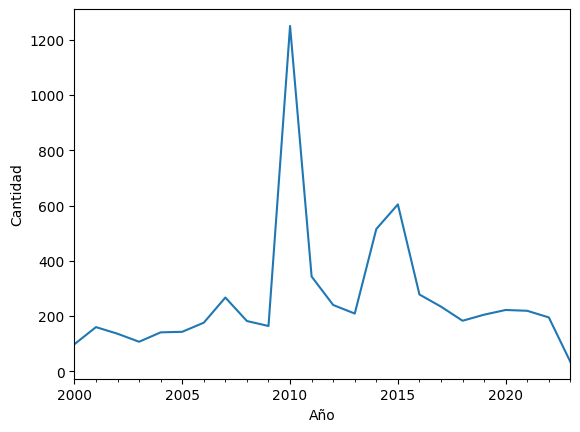

In [ ]:
ultimos_20años = chile[chile['time']>='2000']
ultimos_20años
ultimos_años=df.groupby(ultimos_20años['time'].dt.to_period('Y')).size()
ultimos_años.plot.line()
plt.ylabel('Cantidad', fontsize=10)
plt.xlabel('Año', fontsize=10)


In [ ]:
ultimos_años.describe()

count      24.000000
mean      262.708333
std       243.778138
min        34.000000
25%       155.750000
50%       200.000000
75%       246.750000
max      1250.000000
dtype: float64

Respuesta: Los gráficos de lineas nos muestran que en 2010 se produjeron la mayor cantidad de sismos, 1250. Siendo un número mayor a la media de los registros totales 91 y de la media de los últimos 23 años que es de 263 sismos por año.

Cabe destacar que en 1970 la medición de los terremotos fue en aumento gracias a la tecnología.

###3.¿Cómo fueron los eventos agrupados por meses en los últimos 2 años?

<ipython-input-12-1679b8c8da2f>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  mes_accidentes =ultimos_2años.groupby(ultimos_2años['time'].dt.to_period('M')).size()


<Axes: xlabel='time'>

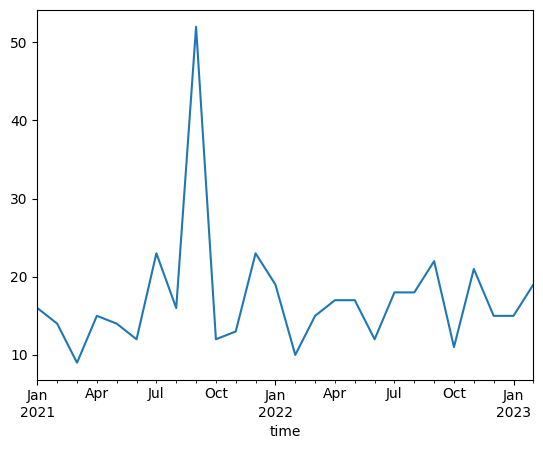

In [ ]:
ultimos_2años = chile[chile['time']>='2021']
ultimos_2años
mes_accidentes =ultimos_2años.groupby(ultimos_2años['time'].dt.to_period('M')).size()

mes_accidentes.plot.line()


<Axes: xlabel='time'>

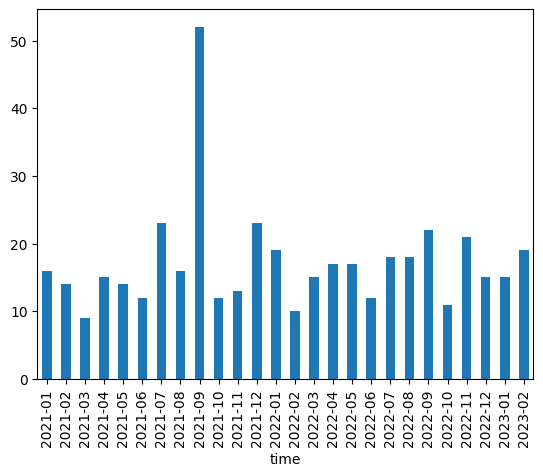

In [ ]:
mes_accidentes.plot.bar()


In [ ]:
mes_accidentes

time
2021-01    16
2021-02    14
2021-03     9
2021-04    15
2021-05    14
2021-06    12
2021-07    23
2021-08    16
2021-09    52
2021-10    12
2021-11    13
2021-12    23
2022-01    19
2022-02    10
2022-03    15
2022-04    17
2022-05    17
2022-06    12
2022-07    18
2022-08    18
2022-09    22
2022-10    11
2022-11    21
2022-12    15
2023-01    15
2023-02    19
Freq: M, dtype: int64

In [ ]:
mes_accidentes.describe()

count    26.000000
mean     17.230769
std       8.056340
min       9.000000
25%      13.250000
50%      15.500000
75%      18.750000
max      52.000000
dtype: float64

<ipython-input-16-ff6e9f2d8024>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  accidentes_dia=ultimos_2años.groupby(ultimos_2años['time'].dt.to_period('D')).size()


<Axes: xlabel='time'>

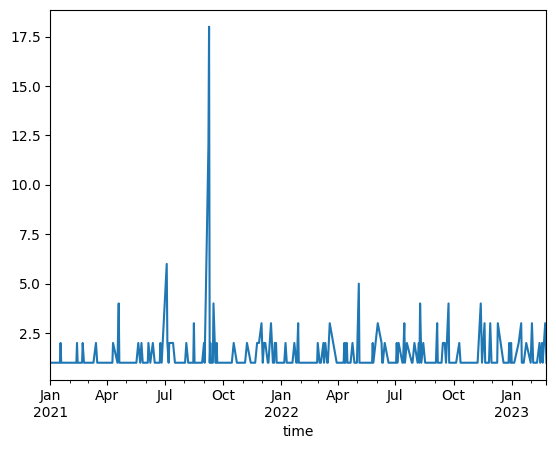

In [ ]:
accidentes_dia=ultimos_2años.groupby(ultimos_2años['time'].dt.to_period('D')).size()
accidentes_dia.plot.line()


Respuesta: Como podemos observar gracias a los gráficos de linea, en los últimos años no hay una tendencia alcista de los terremotos, hay casos outliers como en Septiembre del 2021 que se produjeron 52 casos con una media en lo últimos años de 18 casos.

###4.¿Cuáles son las zonas más afectadas en Chile? y ¿los 10 terremotos más fuertes de Chile?

Para el objetivo del modelo analizaremos un caso testigo, en este caso Chile, que nos aporta una gran cantidad de registros además de ser la zona de Sudamerica con más casos.

<Axes: >

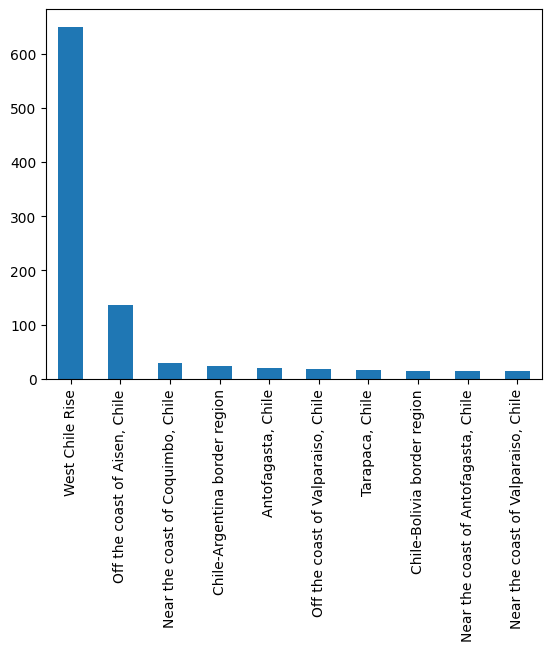

In [ ]:
#Creación de Data Frame con datos de Chile para muestreo de Datos

chile=df[df['place'].str.contains('Chile',case=False,na=False,regex=True)]
zonas_afectadas = chile['place'].value_counts(sort=True).head(10)

zonas_afectadas.plot.bar()

In [ ]:
zonas_afectadas

West Chile Rise                         650
Off the coast of Aisen, Chile           136
Near the coast of Coquimbo, Chile        29
Chile-Argentina border region            23
Antofagasta, Chile                       20
Off the coast of Valparaiso, Chile       18
Tarapaca, Chile                          16
Chile-Bolivia border region              15
Near the coast of Antofagasta, Chile     15
Near the coast of Valparaiso, Chile      15
Name: place, dtype: int64

Text(0.5, 1.0, 'Terremotos en West Chile Rise')

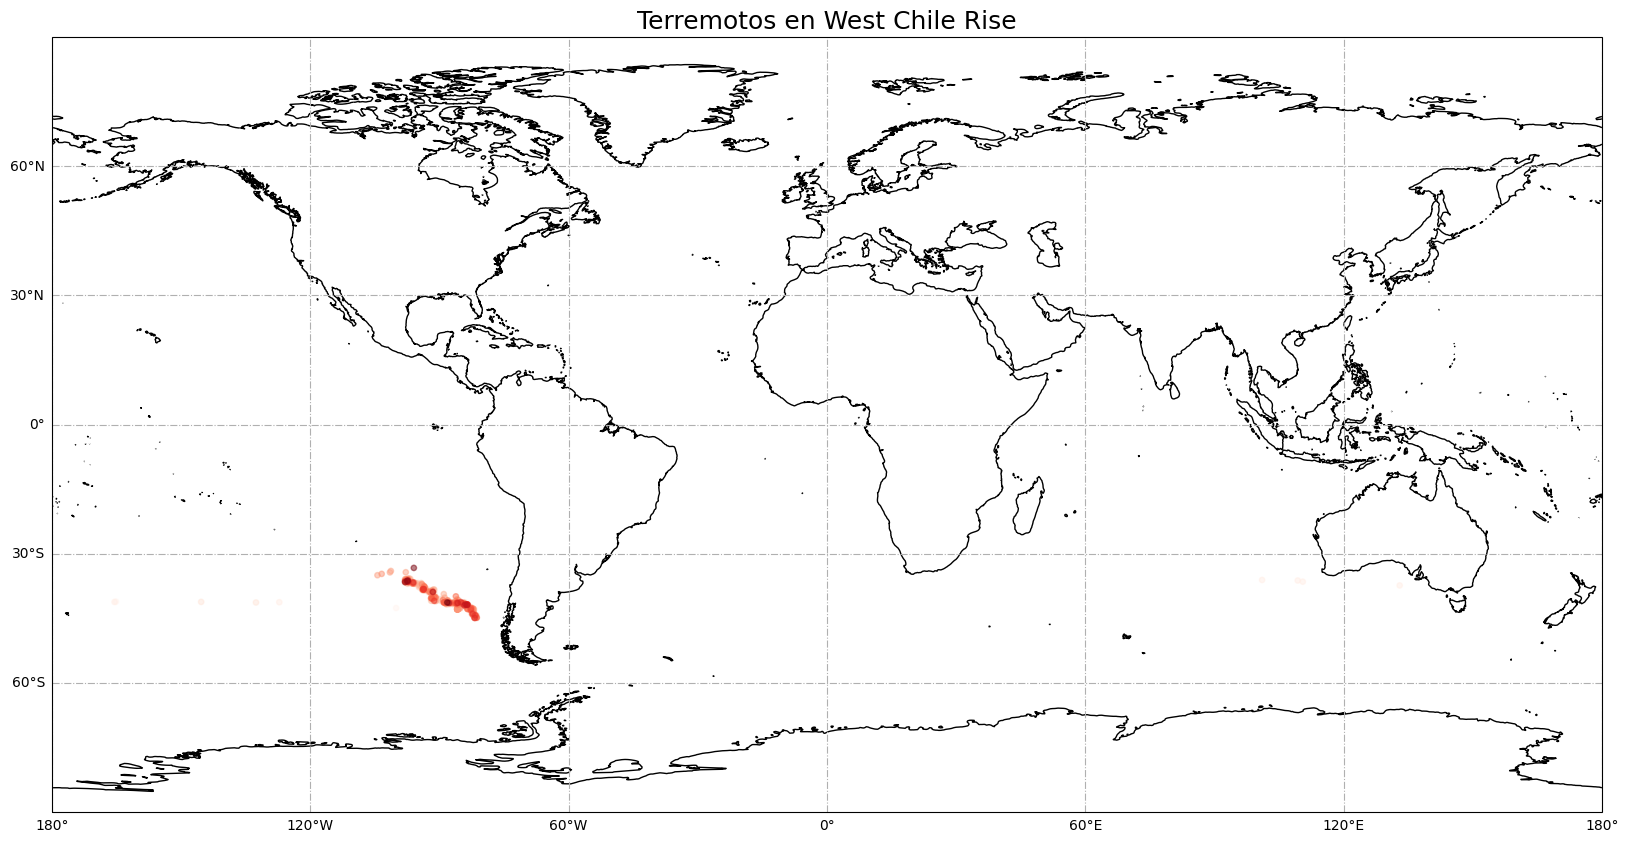

In [ ]:
west_chile_rise = chile[chile['place']=='West Chile Rise']
wcr = west_chile_rise

plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree())
gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False # removing the top label
gl.right_labels = False
ax.coastlines(resolution='50m', color='black', linewidth=1)
p = ax.scatter(x=wcr['longitude'], y=wcr['latitude'], c =wcr['mag'].sort_values(), cmap='Reds', alpha=0.5, s=15)
plt.ylabel('Magnitud', fontsize=16)
plt.title('Terremotos en West Chile Rise', fontsize=18)

Respuesta: La zona con más registros es la denominada "West Chile Rise" con 650 eventos dista de la siguiente zona que es "Off the Coast of Aisen, Chile".

Como podemos ver en el Mapa Mundi es una zona fuera de la plataforma terrestre.

###5.¿Cómo se distribuye la magnitud de los eventos en Chile a lo largo de los años?

<Axes: xlabel='time', ylabel='mag'>

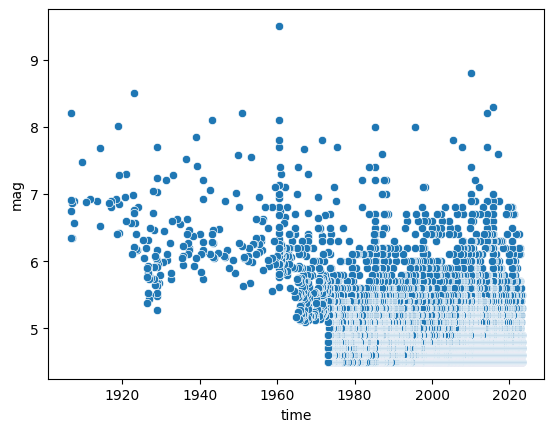

In [ ]:
sns.scatterplot(data=chile, x='time',y='mag')

In [ ]:
#Terremotos Destructivos de acuerdo a la Escala Ritcher mag>8
terremotos_masfuertes = chile[chile['mag']>=8]
terremotos_masfuertes

,time,latitude,longitude,mag,depth,energía,place
55156,2015-09-16 22:54:32.860000+00:00,-315.729,-716.744,8.30,22.44,1.778279e+17,"48 km W of Illapel, Chile"
66466,2014-04-01 23:46:47.260000+00:00,-196.097,-707.691,8.20,25.00,1.258925e+17,"93 km NW of Iquique, Chile"
98540,2010-02-27 06:34:11.530000+00:00,-36.122,-72.898,8.80,22.90,1.000000e+18,"36 km WNW of Quirihue, Chile"
179166,1995-07-30 05:11:23.630000+00:00,-23.340,-70.294,8.00,45.60,6.309573e+16,"36 km NNE of Antofagasta, Chile"
223615,1985-03-03 22:47:07.280000+00:00,-33.135,-71.871,8.00,33.00,6.309573e+16,"25 km WSW of Valparaíso, Chile"
272373,1960-05-22 19:11:20+00:00,-38.143,-73.407,9.50,25.00,1.122018e+19,1960 Great Chilean Earthquake (Valdivia Earthq...
272380,1960-05-21 10:02:57.560000+00:00,-37.824,-73.353,8.10,25.00,8.912509e+16,"4 km ESE of Cañete, Chile"
275385,1950-12-09 21:38:51.980000+00:00,-23.977,-67.912,8.20,113.90,1.258925e+17,"121 km SSE of San Pedro de Atacama, Chile"
276659,1943-04-06 16:07:18.060000+00:00,-31.262,-71.368,8.10,35.00,8.912509e+16,"45 km NNW of Illapel, Chile"
281735,1922-11-11 04:32:51+00:00,-28.293,-69.852,8.50,70.00,3.548134e+17,"94 km ENE of Vallenar, Chile"


Text(0.5, 1.0, 'Cantidad de sismos Mag>8 por año')

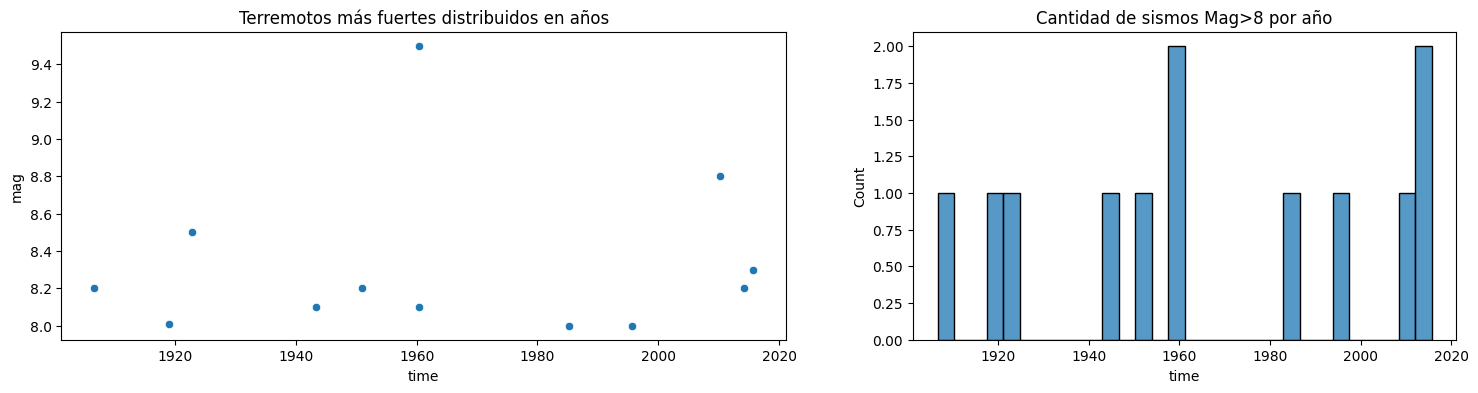

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=terremotos_masfuertes, x="time", y="mag", ax=axs[0])
sns.histplot(data=terremotos_masfuertes, x="time",bins=30, ax=axs[1])
axs[0].set_title('Terremotos más fuertes distribuidos en años')
axs[1].set_title('Cantidad de sismos Mag>8 por año')

In [ ]:
df_size = len(chile['time'])
df_size

terremotos_masfuertes_size = len(terremotos_masfuertes['time'])
terremotos_masfuertes_size

print('{} es el porcentaje de terremotos que superan >8 Magnitud'.format((terremotos_masfuertes_size / df_size) * 100))

0.11812186238803032 es el porcentaje de terremotos que superan >8 Magnitud


Respuesta: Los datos del Dataset superan los 4,5 de Magnitud en la escala de Ritcher, podemos ver que a partir de la década del 70 este dato fue más confiable.

A lo largo de los años, en Chile hubieron 12 registros de movimientos sismicos que superaron la escala de los 8 puntos en Ritcher, lo que significan terremotos Destructivos, con daños en estructuras.

Represetando además el 0,12% de los eventos totales registrados en el país.

##5) Conclusión

Gracias a este análisis pudimos observar que los datos generales del Dataset confirman la mayor propensión a ocurrir en lugares cercanos a límites de placas tectonicas.

Ahora bien, se decicidió intervenir sobre una zona puntual, en este caso Chile, que limita con las placas de Nazca y Sudamericana para realizar la Exploración de los Datos y detectamos:

1. En los últimos años no existe una tendencia alcista, si se reconocen picos como en el año 2010 que superó los 1200 registros.

2. De los últimos 2 años, podemos reafirmar esta tendencia de no incrementar los eventos, sino picos como en Septiembre de 2021, con 52 registros. Teniendo una media de 18 eventos por mes en los últimos 2 años.

3. La zona más afectada es "West Chile Rise" que esta fuera de la superficie terrestre.

4. La magnitud de los eventos se concentra mayoritariamente entre los valores de 4,5 y 6 en la escala de Ritcher.

5. La probabilidad de ocurrencia de que un evento sea superior su magnitud a 8 puntos de la Escala de Ritcher es de 0,12%.

Otra información que se puede agregar es en función del valor de la magnitud como se categoriza a ese evento, también se pueden agregar los límites en función de los lugares donde ocurren los eventos.




### 1.Regresión Lineal dependencia de la magnitud sobre la profundidad de los terremotos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df.head()

,time,latitude,longitude,mag,depth,energía,place
0,2023-02-26 23:58:05.052000+00:00,41.805,798.675,5.0,10.000,1.995262e+12,"77 km NNW of Aksu, China"
2,2023-02-26 21:42:14.541000+00:00,420.857,799.516,4.9,10.000,1.412538e+12,NaN
8,2023-02-26 13:03:24.206000+00:00,84.375,-827.986,4.5,6.339,3.548134e+11,Panama-Costa Rica border region
23,2023-02-25 16:25:15.081000+00:00,-368.717,-734.591,4.8,26.580,1.000000e+12,"33 km WNW of Coronel, Chile"
27,2023-02-25 10:27:12.200000+00:00,379.941,340.224,5.2,16.466,3.981072e+12,"19 km ENE of Emirgazi, Turkey"


1. Creación de variable independiente y dependiente

In [ ]:
#DEPENDENCIA DE LA PROFUNDIDAD RESPECTO DE LA MAGNITUD DEL EVENTO
#X VARIABLE INDEPENDIENTE
x=df['depth']
#Y VARIABLE DEPENDIENTE
y=df['mag']

2. Entrenamiento del Modelo




In [ ]:
#Datos que sirven para el entrenamiento
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

print("X_train")
print(X_train)
print("y_train")
print(y_train)

#Modelo Regresion Lineal
#Reshape para que pueda recibir los datos como corresponde
X_train=X_train.values.reshape([X_train.values.shape[0],1])
X_test=X_test.values.reshape([X_test.values.shape[0],1])

#Entrenamiento del Modelo
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

X_train
101258    10.0
190620    33.0
216113    77.6
190400    79.9
200223    11.3
          ... 
162122    59.7
145756    33.0
174269    33.0
189302    33.0
164224    33.0
Name: depth, Length: 119513, dtype: float64
y_train
101258    5.1
190620    5.3
216113    5.4
190400    4.5
200223    6.4
         ... 
162122    5.1
145756    4.5
174269    4.9
189302    5.2
164224    4.5
Name: mag, Length: 119513, dtype: float64


LinearRegression()

3. Predicciones con el Modelo

Error:  0.25134469035757484
Valor r2: 0.0021266977892194783


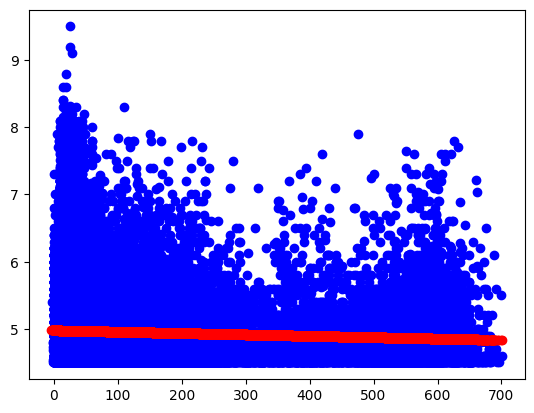

In [ ]:
#X_test conjunto de datos que utilizo para hacer las pruebas
y_pred=regr.predict(X_test)

plt.scatter(X_train,y_train,color='blue')
plt.scatter(X_test,y_pred,color='red')

#Error de la distancia entre lo real y lo predecible
print("Error: ",mean_squared_error(y_test,y_pred))
print("Valor r2:",r2_score(y_test,y_pred))



Respuesta: Podemos ver que el valor de R2 no es un valor representativo, es igual a 0 por lo que no corresponde para este caso, dado que la magnitud y la profundidad son dos variables independientes.

X1_train
272373     25.0
98540      22.9
66466      25.0
283078     35.0
223615     33.0
275385    113.9
179166     45.6
272380     25.0
Name: depth, dtype: float64
y1_train
272373    9.5
98540     8.8
66466     8.2
283078    8.2
223615    8.0
275385    8.2
179166    8.0
272380    8.1
Name: mag, dtype: float64
Error:  0.07868280978861174
Valor r2: -1.199764033929382


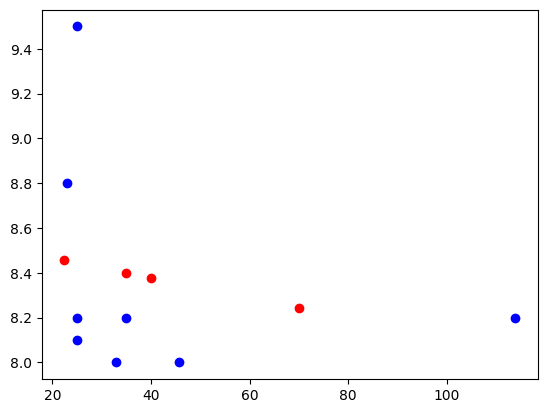

In [ ]:
#TERREMOTOS MAS FUERTES

terremotos_masfuertes
#DEPENDENCIA DE LA PROFUNDIDAD RESPECTO DE LA MAGNITUD DEL EVENTO
#X VARIABLE INDEPENDIENTE
x1=terremotos_masfuertes['depth']
#Y VARIABLE DEPENDIENTE
y1=terremotos_masfuertes['mag']

#Datos que sirven para el entrenamiento
X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

print("X1_train")
print(X1_train)
print("y1_train")
print(y1_train)

#Modelo Regresion Lineal
#Reshape para que pueda recibir los datos como corresponde
X1_train=X1_train.values.reshape([X1_train.values.shape[0],1])
X1_test=X1_test.values.reshape([X1_test.values.shape[0],1])

#Entrenamiento del Modelo
regr=linear_model.LinearRegression()
regr.fit(X1_train,y1_train)

#X_test conjunto de datos que utilizo para hacer las pruebas
y1_pred=regr.predict(X1_test)

plt.scatter(X1_train,y1_train,color='blue')
plt.scatter(X1_test,y1_pred,color='red')

#Error de la distancia entre lo real y lo predecible
print("Error: ",mean_squared_error(y1_test,y1_pred))
print("Valor r2:",r2_score(y1_test,y1_pred))

In [ ]:
print(X1_test)
print(y1_pred)

[[40.  ]
 [70.  ]
 [22.44]
 [35.  ]]
[8.3779898  8.24510994 8.45576881 8.40013644]


### 2.Random Forest para predecir magnitud y profundidad teniendo como variable independiente al tiempo, latitud y longitud.

In [ ]:
df.head()

,time,latitude,longitude,mag,depth,energía,place
0,2023-02-26 23:58:05.052000+00:00,41.805,798.675,5.0,10.000,1.995262e+12,"77 km NNW of Aksu, China"
2,2023-02-26 21:42:14.541000+00:00,420.857,799.516,4.9,10.000,1.412538e+12,NaN
8,2023-02-26 13:03:24.206000+00:00,84.375,-827.986,4.5,6.339,3.548134e+11,Panama-Costa Rica border region
23,2023-02-25 16:25:15.081000+00:00,-368.717,-734.591,4.8,26.580,1.000000e+12,"33 km WNW of Coronel, Chile"
27,2023-02-25 10:27:12.200000+00:00,379.941,340.224,5.2,16.466,3.981072e+12,"19 km ENE of Emirgazi, Turkey"


In [ ]:
df['timestamp'] = df.time.astype('int64') // 10**9

<ipython-input-117-136648a56acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df.time.astype('int64') // 10**9


In [ ]:
df.head()

,time,latitude,longitude,mag,depth,energía,place,timestamp
0,2023-02-26 23:58:05.052000+00:00,41.805,798.675,5.0,10.000,1.995262e+12,"77 km NNW of Aksu, China",1677455885
2,2023-02-26 21:42:14.541000+00:00,420.857,799.516,4.9,10.000,1.412538e+12,NaN,1677447734
8,2023-02-26 13:03:24.206000+00:00,84.375,-827.986,4.5,6.339,3.548134e+11,Panama-Costa Rica border region,1677416604
23,2023-02-25 16:25:15.081000+00:00,-368.717,-734.591,4.8,26.580,1.000000e+12,"33 km WNW of Coronel, Chile",1677342315
27,2023-02-25 10:27:12.200000+00:00,379.941,340.224,5.2,16.466,3.981072e+12,"19 km ENE of Emirgazi, Turkey",1677320832


In [ ]:
#MODELO X=TIMESTAMP-LAT-LONG // Y=MAG-DEPTH
X= df[['timestamp', 'latitude', 'longitude']]
y= df[['mag', 'depth']]


#entrenamiento
#Datos que sirven para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

(191220, 3) (47806, 3) (191220, 2) (47806, 3)


In [ ]:
reg.score(X_test, y_test)

0.575549511067081

In [ ]:
print(X_test)
print(y_pred)

         timestamp  latitude  longitude
271444  -201390160   28.0100    139.894
238924   351450288   55.0220    165.840
132599  1108388702    1.8570     92.276
24430   1577522941    0.6167    927.074
269091   -52704526  -38.3340    -71.242
...            ...       ...        ...
86942   1307592847   21.6580    144.273
228599   440617047   75.0980     15.680
15965   1615051151 -159.4450   -725.139
250790   242064334   -6.9250    156.012
164474   912348023  -10.6980    163.516

[47806 rows x 3 columns]
[[  5.0352  444.768  ]
 [  4.803    32.442  ]
 [  4.868    26.637  ]
 ...
 [  4.652    64.24323]
 [  4.9637   75.383  ]
 [  4.896    61.754  ]]


In [ ]:
#chile
chile=df[df['place'].str.contains('Chile',case=False,na=False,regex=True)]
#MODELO X=TIMESTAMP-LAT-LONG // Y=MAG-DEPTH
X= chile[['timestamp', 'latitude', 'longitude']]
y= chile[['mag', 'depth']]


#entrenamiento
#Datos que sirven para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
reg.score(X_test, y_test)

(8127, 3) (2032, 3) (8127, 2) (2032, 3)


0.5170539918689099